In [13]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import random

#### 检查空值

In [14]:
for i in range(0,6):
    file_dir=r'data/'
    file_name=str(i)+'.xlsx'


    data=pd.read_excel(file_dir+file_name, header= None, index_col= 0)
    column_index = 0 
    null_values_count = data.iloc[:, column_index].isnull().sum()

    # null_values_per_column = data.isnull().sum()
    print(f"The number of null values in {file_name} is: {null_values_count}")

The number of null values in 0.xlsx is: 1
The number of null values in 1.xlsx is: 0
The number of null values in 2.xlsx is: 0
The number of null values in 3.xlsx is: 1
The number of null values in 4.xlsx is: 1
The number of null values in 5.xlsx is: 5


c:\Users\20505\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\20505\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\20505\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### 循环每个excel，如果空值数量大于总数的0.01，则读取该excel空值数量并输出excel名字

In [15]:
import warnings
warnings.filterwarnings("ignore")


for i in range(0,317):
    file_dir=r'PV_pinshan/'
    file_name=str(i)+'.xlsx'
    data=pd.read_excel(file_dir+file_name, header= None)

    # 获取指定列的空值个数
    null_count = data.iloc[:, column_index].isnull().sum()
    total_cells = data.shape[0]

    percentage_null = null_count / total_cells

    if percentage_null > 0.01:
        print(f"The number of null values in column {column_index} of {file_name}: {null_count}, and the percentage of null is {percentage_null}")

The number of null values in column 0 of 0.xlsx: 1, and the percentage of null is 0.012987012987012988
The number of null values in column 0 of 157.xlsx: 1, and the percentage of null is 0.038461538461538464
The number of null values in column 0 of 190.xlsx: 2, and the percentage of null is 0.015384615384615385
The number of null values in column 0 of 191.xlsx: 1, and the percentage of null is 0.02564102564102564
The number of null values in column 0 of 263.xlsx: 3, and the percentage of null is 0.01675977653631285
The number of null values in column 0 of 267.xlsx: 1, and the percentage of null is 0.010752688172043012
The number of null values in column 0 of 276.xlsx: 1, and the percentage of null is 0.07692307692307693


#### 将空值替换为该单元平均值

In [122]:
def replace_empty_with_mean(column):
    # 计算平均值，不包括空值
    non_empty_values = [val for val in column if not pd.isnull(val)]
    if not non_empty_values:
        # 如果列表中没有非空值，则无法计算平均值
        return column
    average = sum(non_empty_values) / len(non_empty_values)

    # 替换空值为平均值
    result_column = [val if not pd.isnull(val) else average for val in column]
    return result_column

for i in range(0,317):
    file_dir=r'PV_pinshan/'
    file_name=str(i)+'.xlsx'
    data=pd.read_excel(file_dir+file_name, header= None)


    # 循环遍历所有列，将空值替换为平均值
    for column_name in data.columns:
        data[column_name] = replace_empty_with_mean(data[column_name])

    # 保存回Excel文件
    output_folder = r'new_data/'
    file_name_new = str(i)+'_new.xlsx'
    output_file_path = output_folder + file_name_new
    data.to_excel(output_file_path, index=False,header= None)


#### 处理异常值，将mm单位计算的光伏进行校正

In [142]:
for i in range(0,317):
    file_dir=r'new_data/'
    file_name=str(i)+'_new.xlsx'

    data=pd.read_excel(file_dir + file_name, header= None)

    if data.iloc[0, 0] < 1 and data.iloc[:, 0].mean() < 1:    # 发电量及所有建筑平均值<1
        data.iloc[:, 0] *= 1000000
        
    rejust_folder = r'rejust_data/'  # 替换为你想要保存文件的文件夹路径
    rejust_filename = 'rejust_' + file_name  # 可以根据需要修改保存的文件名
    rejust_file_path = os.path.join(rejust_folder, rejust_filename)
    data.to_excel(rejust_file_path, index=False, header= None)

#### 计算每个excel的光伏发电量之和、加权遮挡率

In [146]:
# 计算单个的加权（检验）
file_path = 'rejust_2_new.xlsx'  # 替换为你的Excel文件路径
df = pd.read_excel(file_path, header=None)

# 提取第一列和第二列的数据
weights = df.iloc[:, 0]
values = df.iloc[:, 1]

# 计算加权平均数
weighted_average = (weights * values).sum() / weights.sum()

print("加权平均数:", weighted_average)

加权平均数: 14.23822105482461


In [255]:
# 定义文件夹路径和文件后缀
folder_path = r'rejust_data/'
file_suffix = ".xlsx"

# 初始化用于存储加权平均数和文件名的列表
sum_of_first_column = []
weighted_averages = []
file_names = []

# 循环遍历文件夹中的所有文件，并计算加权平均数
for filename in os.listdir(folder_path):
    if filename.endswith(file_suffix):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path, header=None)

        # 计算第一列之和
        first_column_sum = df.iloc[:, 0].sum()
        sum_of_first_column.append(first_column_sum)
        
        # 提取第一列和第二列的数据
        weights = df.iloc[:, 0]
        values = df.iloc[:, 1]

        # 计算加权平均数并添加到列表
        weighted_average = (weights * values).sum() / weights.sum()
        weighted_averages.append(weighted_average)
        
        file_names.append(filename)

# 创建带有文件名和加权平均数的字典，用于排序
data = {'File Name': file_names, 'PV generation': sum_of_first_column, 'Shade ratio': weighted_averages}

# 创建 DataFrame 并按照文件名中的数字顺序排序
result_df = pd.DataFrame(data)
result_df['File Name'] = result_df['File Name'].str.extract('(\d+)').astype(int)  # 提取数字部分并转换为整数
result_df = result_df.sort_values(by='File Name').reset_index(drop=True)


In [256]:
result_df

,File Name,PV generation,Shade ratio
0,0,2.550481e+06,8.135852
1,1,6.433972e+06,8.556050
2,2,2.449786e+06,14.238221
3,3,2.909521e+06,10.944536
4,4,7.157235e+06,11.811791
...,...,...,...
312,312,4.653299e+06,12.465801
313,313,1.430295e+06,10.983916
314,314,3.114491e+06,5.174113
315,315,3.971702e+06,11.004337


#### 建立坪山区指标矩阵
*光伏发电、能耗、社区建筑面积、*建筑平均高度、*屋顶面积、建筑数量

PV generation, Shade ratio, Number, Building area, Floor area ratio, Footprint, average height, roof area

In [268]:
def read_sheet(file_path, sheet_index):
    try:
        result_df = pd.read_excel(file_path, sheet_name=sheet_index, header=None)
        return result_df
    except Exception as e:
        print(f"Error occurred while reading the Excel file: {e}")
        return None

file_path = 'pinshan_v1.xlsx'
sheet_index = 6

new_sheet_df = read_sheet(file_path, sheet_index)
new_sheet_df.columns = ["Number"]

# 使用concat函数将result_df和new_sheet_df按列拼接
result_df = pd.concat([result_df, new_sheet_df], axis=1)


In [277]:
result_df
# 将 DataFrame 导出为 CSV 文件
result_df.to_csv('output_v1.csv', index=False)

In [29]:
result_df = pd.read_csv('output_v1.csv')
result_df
# column_to_remove = "File Name"
# result_df.drop(column_to_remove, axis=1, inplace=True)

,PV generation,Shading rate,average height,Footprint,roof area,Floor area ratio,Building area,Number,Consumption,Cluster
0,2.550481e+06,8.135852,7.558442,0.213726,19056.189430,1.581319,140992.965300,77,5.789079e+06,4
1,6.433972e+06,8.556050,12.805556,0.293953,46395.289440,3.726849,588217.119300,432,4.887491e+07,5
2,2.449786e+06,14.238221,16.310924,0.265126,18643.522860,4.133545,290668.400300,119,1.663800e+07,5
3,2.909521e+06,10.944536,6.356436,0.396095,21558.358120,2.034833,110750.288100,101,7.857973e+06,5
4,7.157235e+06,11.811791,13.281623,0.155298,54186.984920,2.278871,795149.017800,419,4.796226e+07,5
...,...,...,...,...,...,...,...,...,...,...
312,4.653299e+06,12.465801,10.660000,0.405871,36208.417590,3.786722,337819.993000,150,1.661564e+07,2
313,1.430295e+06,10.983916,9.096774,0.442447,10557.657890,5.161403,123161.218500,31,5.948357e+06,1
314,3.114491e+06,5.174113,10.057554,0.229558,21273.614910,2.462276,228184.436100,139,1.364464e+07,1
315,3.971702e+06,11.004337,9.597510,0.367517,29555.251060,3.278432,263647.301600,241,1.895775e+07,5


#### 相关性分析

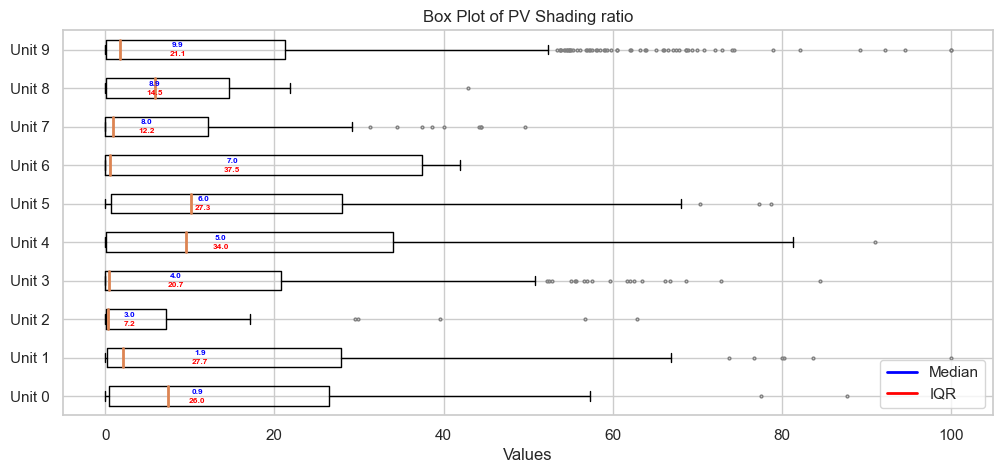

In [26]:
folder_path = r"rejust_data/"
all_files = os.listdir(folder_path)
excel_files = [file for file in all_files if file.endswith(".xlsx")]

# 从文件列表中随机选择 20 个文件
random_files = random.sample(excel_files, 10)

all_data = []

for file_name in random_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path, usecols=[1], header=None, squeeze=True)
    all_data.append(df)


# 绘制箱线图
plt.figure(figsize=(12, 5))  # 可选：设置图形大小
boxplot = plt.boxplot(all_data, vert=False, medianprops={'linewidth': 2}, flierprops={'marker': 'o', 'markeredgecolor': 'gray', 'markersize': 2})  # vert=False 表示水平方向绘制箱线图

# 设置纵坐标刻度标签，并显示每个箱线图对应的数据源编号
plt.yticks(range(1, 11), [f'Unit {i}' for i in range(0, 10)])


# 创建虚拟的图例元素并添加到图形中
median_legend = plt.Line2D([0], [0], color='blue', lw=2, label='Median')
iqr_legend = plt.Line2D([0], [0], color='red', lw=2, label='IQR')
plt.legend(handles=[median_legend, iqr_legend], loc='lower right')


# 在箱线图上添加数据源编号的数值和中位数的文本标签
for i, box in enumerate(boxplot['boxes']):
    x = box.get_xdata().mean()
    y = i + 1
    median = box.get_ydata().mean()
    q1 = box.get_xdata().min()
    q3 = box.get_xdata().max()
    iqr = q3 - q1
    plt.text(x, y + 0.12, f'{median:.1f}', ha='center', va='center', color='blue', fontweight='bold', fontsize=6)
    plt.text(x, y - 0.12, f'{iqr:.1f}', ha='center', va='center', color='red', fontweight='bold', fontsize=6)

plt.xlabel('Values')  # 设置 x 轴标签
plt.title('Box Plot of PV Shading ratio')  # 设置图标题
plt.show()

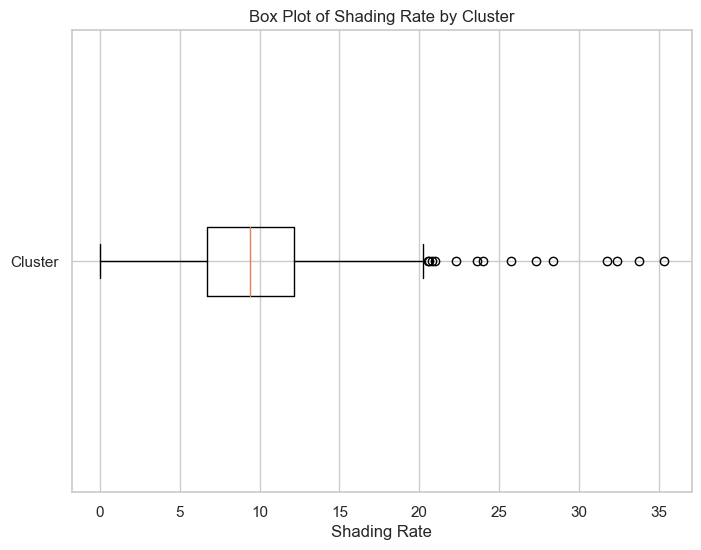

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('output_v1.csv')

# 提取Shading rate和Cluster两列数据
shading_rate = data['Shading rate']
cluster = data['Cluster']

# 颜色参考
colors = ['blue', 'green', 'red', 'purple', 'teal', 'magenta']

# 生成箱线图
plt.figure(figsize=(8, 6))
plt.boxplot(shading_rate, vert=False, labels=cluster.unique(), patch_artist=True, boxprops=dict(facecolor=colors))
plt.xlabel('Cluster')
plt.ylabel('Shading rate')
plt.title('Photovoltaic Shading Rate Distribution Across Clusters')
plt.show()


In [4]:
# 标准化
result_df_standardized = (result_df - result_df.mean()) / result_df.std()
result_df_standardized

,PV generation,Shade ratio,average height,Footprint,roof area,Floor area ratio,Building area,Number,Consumption,type
0,-0.407316,-0.288714,-0.691357,-0.117805,-0.420272,-0.702163,-0.578126,-0.444196,-0.672194,-0.860117
1,0.222560,-0.215859,0.065853,0.463802,0.179307,0.305913,0.127105,1.322274,0.733661,0.753239
2,-0.423648,0.769327,0.571712,0.254820,-0.429323,0.496999,-0.342102,-0.235205,-0.318203,-0.860117
3,-0.349082,0.198261,-0.864818,1.204281,-0.365397,-0.489079,-0.625816,-0.324772,-0.604687,-0.860117
4,0.339868,0.348628,0.134554,-0.541379,0.350188,-0.374418,0.453417,1.257586,0.703881,-0.860117
...,...,...,...,...,...,...,...,...,...,...
312,-0.066253,0.462021,-0.243772,1.275152,-0.044103,0.334044,-0.267748,-0.080950,-0.318932,-0.860117
313,-0.589002,0.205089,-0.469361,1.540310,-0.606655,0.979937,-0.606245,-0.673090,-0.666997,-0.860117
314,-0.315837,-0.802225,-0.330711,-0.003031,-0.371642,-0.288246,-0.440633,-0.135685,-0.415873,-0.860117
315,-0.176804,0.208630,-0.397100,0.997104,-0.190015,0.095225,-0.384711,0.371863,-0.242511,-0.860117


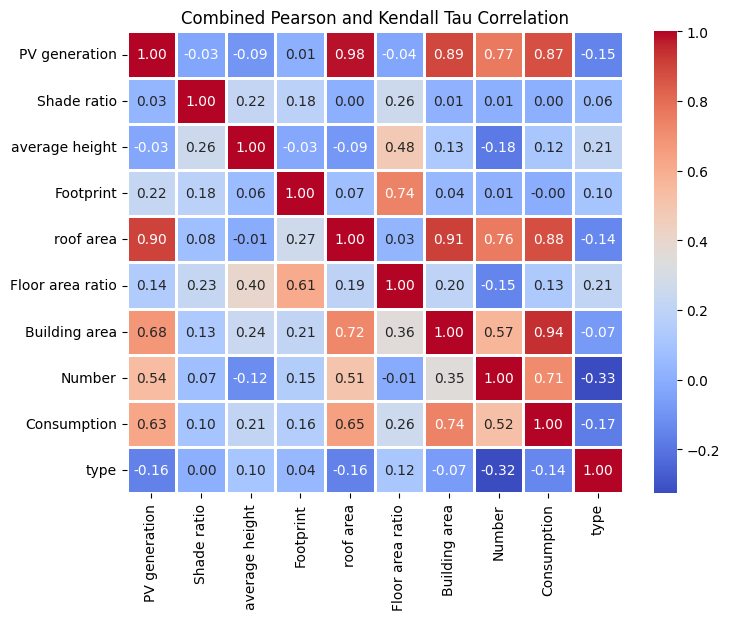

In [5]:
# 计算Pearson相关系数
pearson_corr_matrix = result_df.corr()

# 计算Kendall Tau相关系数
kendall_corr_matrix = result_df.corr(method='kendall')

# 创建行和列的标签，即序号对应的名称
labels = result_df.columns

# 创建合并后的相关系数矩阵
combined_matrix = np.where(np.tril(np.ones(pearson_corr_matrix.shape, dtype=bool)), kendall_corr_matrix, pearson_corr_matrix)

# 绘制热力图，并设置行和列的标签
plt.figure(figsize=(8, 6))
sns.heatmap(combined_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8, cbar=True, 
            xticklabels=labels, yticklabels=labels)
plt.title("Combined Pearson and Kendall Tau Correlation")
plt.show()
